## Import Libraries and Dependencies

In [46]:
# Import necessary libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline



## Set the File Path to the CSVs using the Pathlib Library

In [23]:
# Set the file paths for the CSVs using the Path class from the pathlib library
bnb_csv_path = Path("stable_coin_csv/binance-usd.csv")
dai_csv_path = Path("stable_coin_csv/dai.csv")
frax_csv_path = Path("stable_coin_csv/frax.csv")
mim_csv_path = Path("stable_coin_csv/magic-internet-money.csv")
usdn_csv_path = Path("stable_coin_csv/neutrino.csv")
pax_csv_path = Path("stable_coin_csv/paxos-standard.csv")
ust_csv_path = Path("stable_coin_csv/terrausd.csv")
usdt_csv_path = Path("stable_coin_csv/tether.csv")
usdc_csv_path = Path("stable_coin_csv/usd-coin.csv")
tusd_csv_path = Path("stable_coin_csv/true-usd.csv")

## Import the CSVs as Pandas DataFrames

In [24]:
# Read the daily closing prices of MSFT, set the `date` as a datetime index
bnb_df = pd.read_csv(bnb_csv_path, index_col="date", parse_dates=True, infer_datetime_format=True)
dai_df = pd.read_csv(dai_csv_path, index_col="date", parse_dates=True, infer_datetime_format=True)
frax_df = pd.read_csv(frax_csv_path, index_col="date", parse_dates=True, infer_datetime_format=True)
mim_df = pd.read_csv(mim_csv_path, index_col="date", parse_dates=True, infer_datetime_format=True)
usdn_df = pd.read_csv(usdn_csv_path, index_col="date", parse_dates=True, infer_datetime_format=True)
pax_df = pd.read_csv(pax_csv_path, index_col="date", parse_dates=True, infer_datetime_format=True)
ust_df = pd.read_csv(ust_csv_path, index_col="date", parse_dates=True, infer_datetime_format=True)
usdt_df = pd.read_csv(usdt_csv_path, index_col="date", parse_dates=True, infer_datetime_format=True)
usdc_df = pd.read_csv(usdc_csv_path, index_col="date", parse_dates=True, infer_datetime_format=True)
tusd_df = pd.read_csv(tusd_csv_path, index_col="date", parse_dates=True, infer_datetime_format=True)

## Combine the DataFrames and Sort the Index

In [25]:
# Use the concat function to combine the DataFrames by column and perform an inner join. 
combined_stable_coins_df = pd.concat([bnb_df, dai_df, frax_df, mim_df, usdn_df, pax_df, ust_df, usdt_df, usdc_df, tusd_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_stable_coins_df.sort_index(inplace=True)

# Set column names
combined_stable_coins_df.columns = ['BNB', 'DAI', 'FRAX', 'MIM', 'USDN', 'PAX', 'UST', 'USDT', 'USDC', 'TUSD']

# Display a few rows
combined_stable_coins_df.head()

,BNB,DAI,FRAX,MIM,USDN,PAX,UST,USDT,USDC,TUSD
date,,,,,,,,,,
2021-07-01,1.005939,1.003006,1.008715,1.002117,1.006044,1.003730,1.003830,1.004460,1.003276,1.004077
2021-07-02,1.007472,1.002889,1.005408,1.002117,1.002133,1.003747,1.004322,1.001631,1.004928,1.004896
2021-07-03,1.005306,1.007008,1.007092,1.006019,1.003450,1.004714,1.004724,1.004324,1.003024,1.004268
2021-07-04,1.005213,1.002976,1.005690,0.995576,1.002486,1.003662,1.005640,1.003225,1.002549,1.006580
2021-07-05,1.004266,0.998386,1.002322,0.998593,1.000539,1.002261,1.002448,0.995146,1.001107,1.002127


## Calculate Daily Returns

In [26]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
stable_coin_daily_returns = combined_stable_coins_df.pct_change().dropna()
stable_coin_daily_returns.head()

,BNB,DAI,FRAX,MIM,USDN,PAX,UST,USDT,USDC,TUSD
date,,,,,,,,,,
2021-07-02,0.001524,-0.000116,-0.003278,0.000000,-0.003887,0.000017,0.000490,-0.002816,0.001647,0.000816
2021-07-03,-0.002150,0.004107,0.001674,0.003894,0.001314,0.000964,0.000401,0.002689,-0.001895,-0.000625
2021-07-04,-0.000092,-0.004004,-0.001392,-0.010381,-0.000961,-0.001048,0.000912,-0.001094,-0.000474,0.002302
2021-07-05,-0.000942,-0.004577,-0.003349,0.003030,-0.001941,-0.001396,-0.003175,-0.008053,-0.001438,-0.004425
2021-07-06,-0.003048,0.007519,-0.002265,-0.005440,-0.003721,-0.001488,-0.002653,0.008726,0.000501,-0.003589


### Evaluate Riskiness of Stocks

In [27]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = stable_coin_daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

USDC    0.041331
USDT    0.043255
TUSD    0.043830
BNB     0.044395
UST     0.046606
DAI     0.046806
PAX     0.047339
MIM     0.071748
FRAX    0.089769
USDN    0.230765
dtype: float64

### Drop High Volatility Stocks

In [36]:
# Drop the five stocks with the highest volatility in daily returns
stable_coin_daily_returns.drop(columns=['USDN'], inplace=True)
stable_coin_daily_returns.head()

,BNB,DAI,FRAX,MIM,PAX,UST,USDT,USDC,TUSD
date,,,,,,,,,
2021-07-02,0.001524,-0.000116,-0.003278,0.000000,0.000017,0.000490,-0.002816,0.001647,0.000816
2021-07-03,-0.002150,0.004107,0.001674,0.003894,0.000964,0.000401,0.002689,-0.001895,-0.000625
2021-07-04,-0.000092,-0.004004,-0.001392,-0.010381,-0.001048,0.000912,-0.001094,-0.000474,0.002302
2021-07-05,-0.000942,-0.004577,-0.003349,0.003030,-0.001396,-0.003175,-0.008053,-0.001438,-0.004425
2021-07-06,-0.003048,0.007519,-0.002265,-0.005440,-0.001488,-0.002653,0.008726,0.000501,-0.003589


## Calculate Daily Portfolio Returns

In [38]:
# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
weights = [0.6, 0.4, 0.6, 0.4, 0.6, 0.4, 0.6, 0.4, 0.6]

portfolio_returns = stable_coin_daily_returns.dot(weights)
portfolio_returns.head()

date
2021-07-02   -0.001434
2021-07-03    0.004134
2021-07-04   -0.006373
2021-07-05   -0.013363
2021-07-06   -0.001028
Freq: D, dtype: float64

## Plot Daily Portfolio Returns

<AxesSubplot:xlabel='date'>

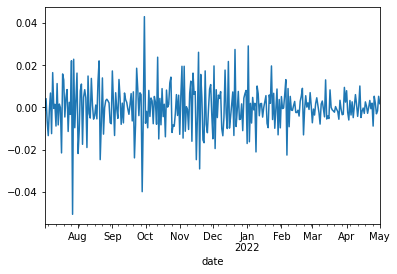

In [39]:
# Use the `plot` function to plot the daily portfolio returns
portfolio_returns.plot()

## Calculate Cumulative Portfolio Returns

In [40]:
# Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.head()

date
2021-07-02   -0.001434
2021-07-03    0.002693
2021-07-04   -0.003696
2021-07-05   -0.017010
2021-07-06   -0.018020
Freq: D, dtype: float64

## Plot Cumulative Portfolio Returns

<AxesSubplot:xlabel='date'>

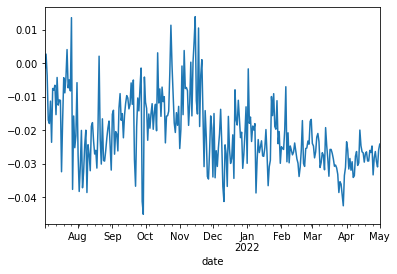

In [41]:
# Use the `plot` function to plot the cumulative portfolio returns
cumulative_returns.plot()

## Calculate std dev for all stable coins

In [42]:
# Calculate std dev
stable_coin_std = stable_coin_daily_returns.std()
stable_coin_std

BNB     0.002797
DAI     0.002948
FRAX    0.005655
MIM     0.004520
PAX     0.002982
UST     0.002936
USDT    0.002725
USDC    0.002604
TUSD    0.002761
dtype: float64

## Calculate sharpe ratio for all data

In [43]:
# Calculate sharpe ratio
sharpe_ratios = (stable_coin_daily_returns.mean() * 252) / (stable_coin_std * np.sqrt(252))
sharpe_ratios.head()

BNB    -0.069107
DAI    -0.009681
FRAX   -0.019514
MIM     0.012017
PAX    -0.027905
dtype: float64

## Plot Sharpe Ratios

<AxesSubplot:title={'center':'Sharpe Ratios'}>

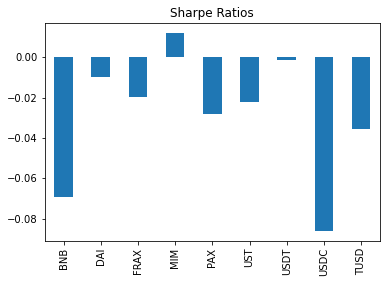

In [44]:
# Plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')